# 1. 앙상블 Ensemble


* 머신러닝 앙상블이란 여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법
  * 보팅 Voting : 투표를 통해 결과를 도출
  * 배깅 Bagging : 샘플 중복 생성을 통해 결과를 도출
  * 부스팅 Boosting : 이전 오차를 보완하면서 가중치를 부여
  * 스태킹 Stacking : 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
target = df.values[1::2, 2]
df.rename(columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO'}, inplace=True)
df.dropna(axis=0, inplace=True)
df['MEDV'] = target

x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'], random_state=42)

<ipython-input-1-43eca6b6ee39>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'], random_state=42)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)

  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions
  global colors

  plot_predictions(name_, pred, actual)

  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse

  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)

  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10

  length = len(df)

  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])

  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)

  plt.show()

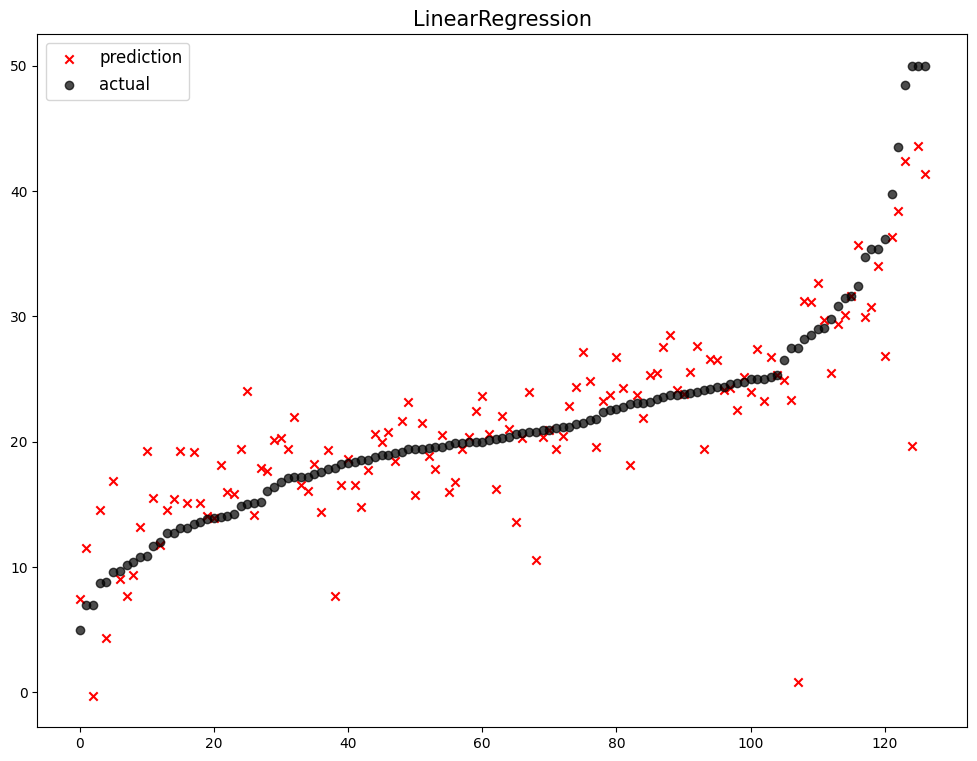

              model        mse
0  LinearRegression  25.525191


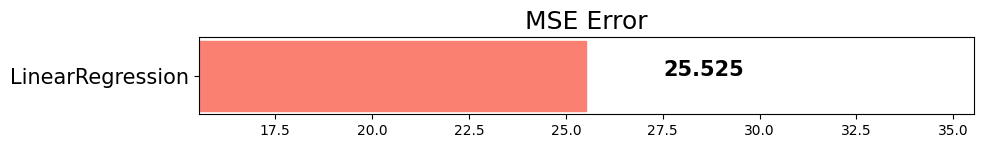

In [3]:
from pandas.core.dtypes.cast import maybe_cast_to_extension_array
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model  import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

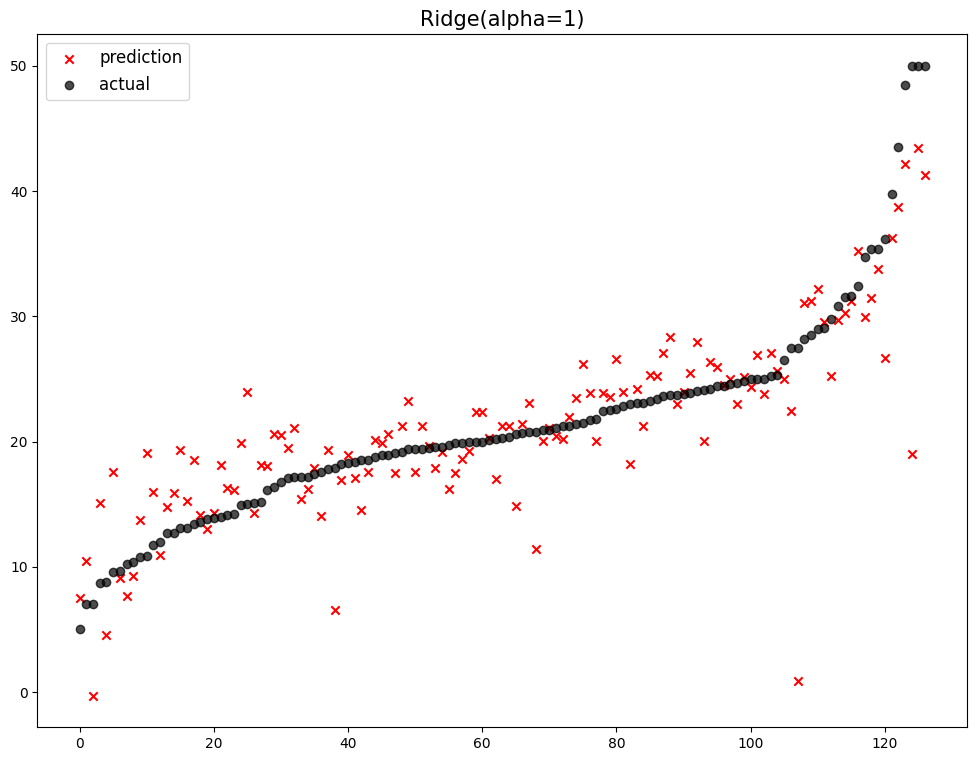

              model        mse
0  LinearRegression  25.525191
1    Ridge(alpha=1)  25.360069


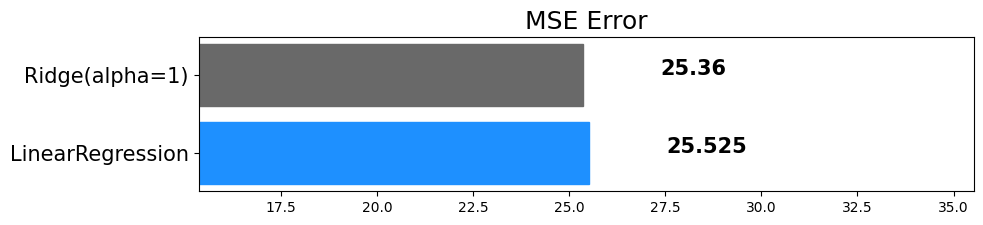

In [4]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

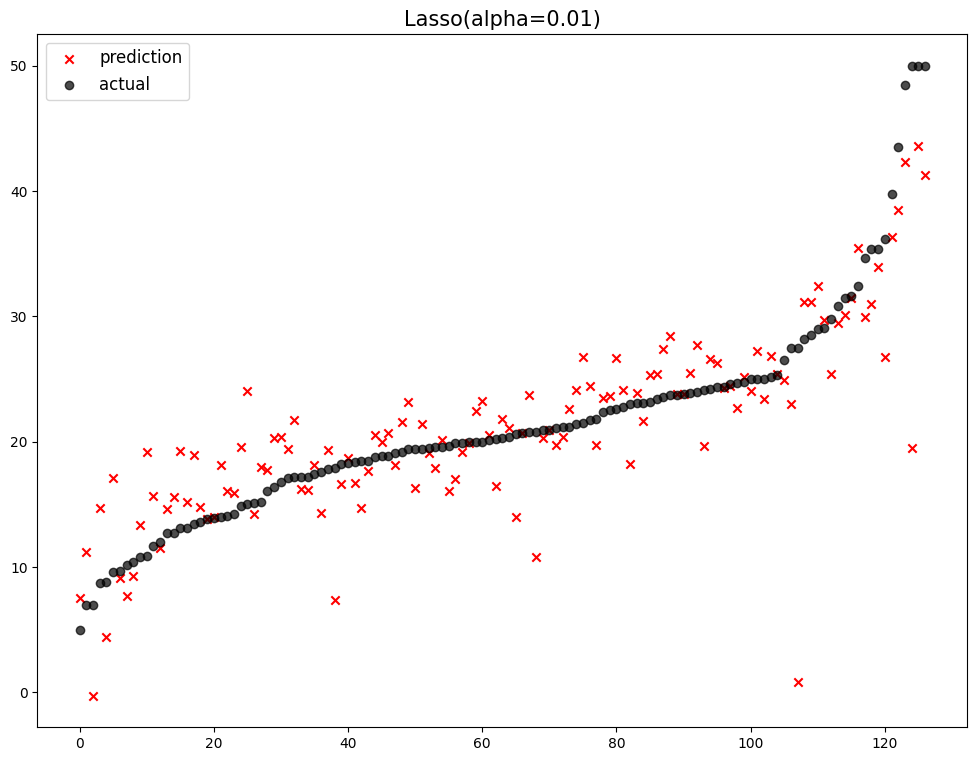

               model        mse
0   LinearRegression  25.525191
1  Lasso(alpha=0.01)  25.380309
2     Ridge(alpha=1)  25.360069


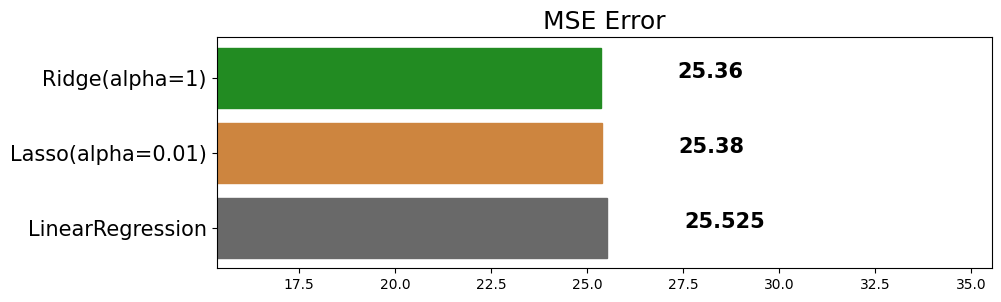

In [5]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

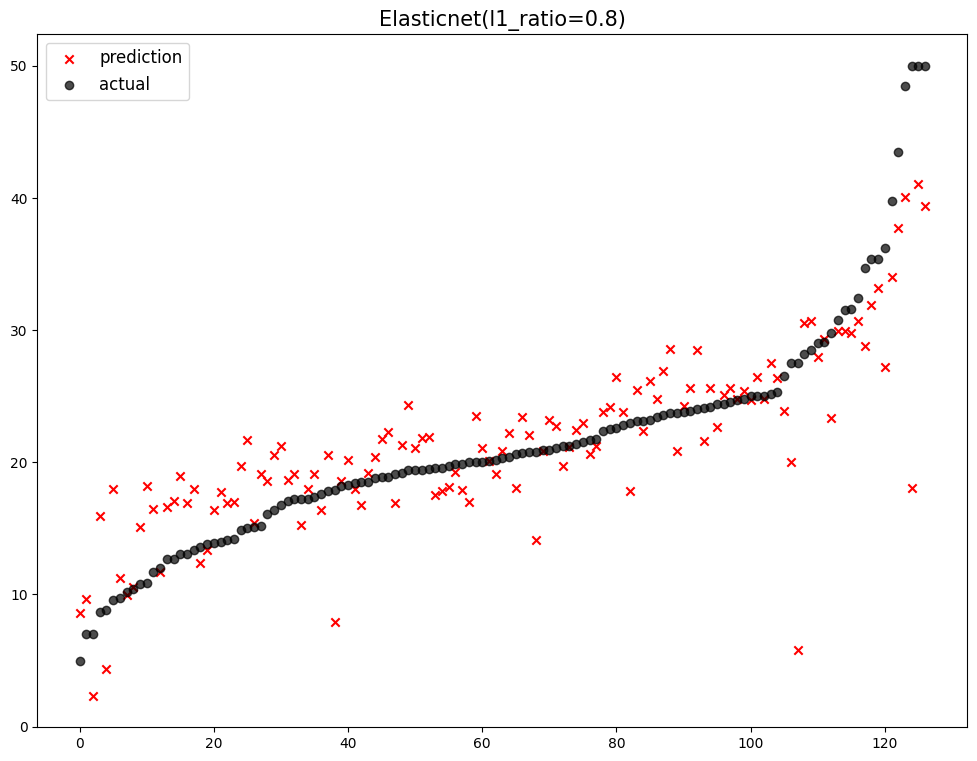

                      model        mse
0          LinearRegression  25.525191
1         Lasso(alpha=0.01)  25.380309
2            Ridge(alpha=1)  25.360069
3  Elasticnet(l1_ratio=0.8)  24.385310


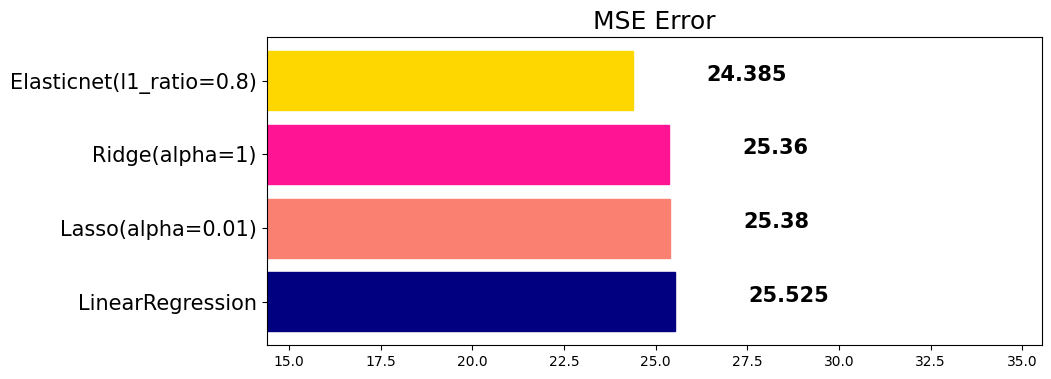

In [6]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('Elasticnet(l1_ratio=0.8)', pred, y_test)

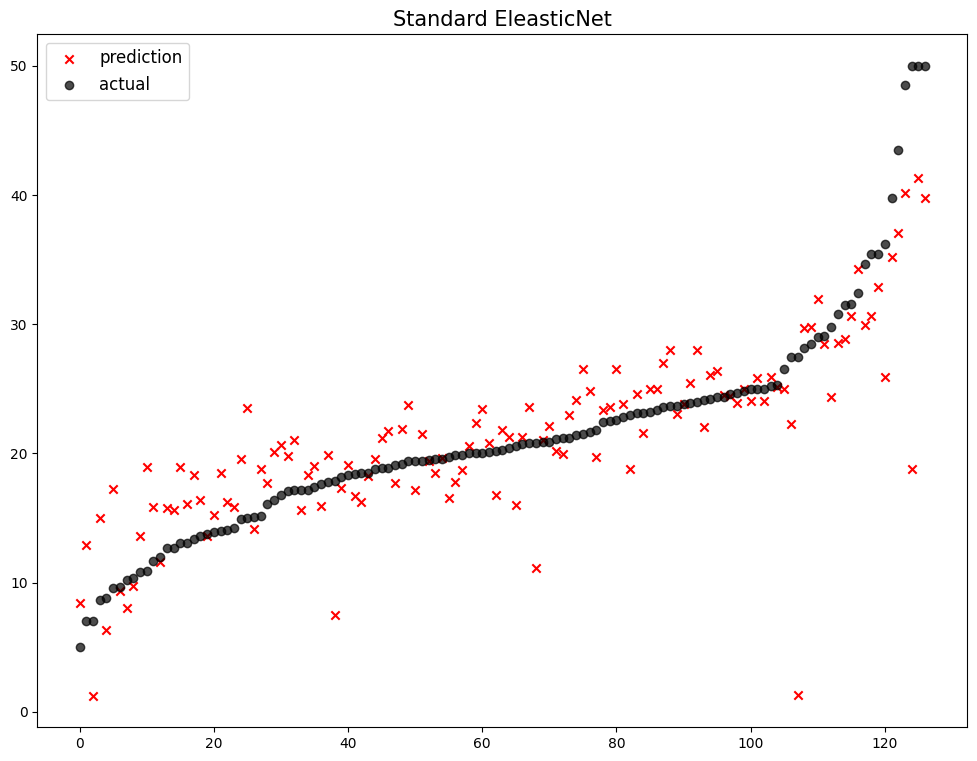

                      model        mse
0      Standard EleasticNet  25.985015
1          LinearRegression  25.525191
2         Lasso(alpha=0.01)  25.380309
3            Ridge(alpha=1)  25.360069
4  Elasticnet(l1_ratio=0.8)  24.385310


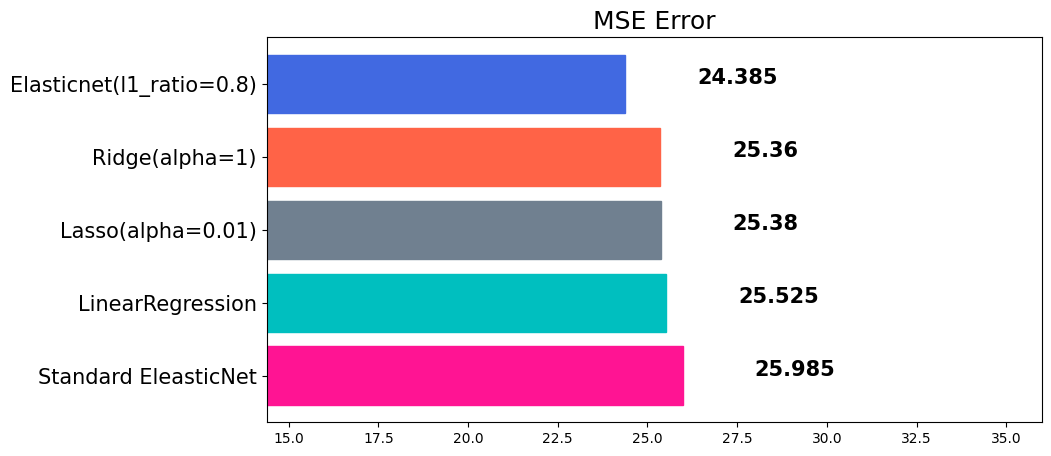

In [7]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard EleasticNet', elasticnet_pred, y_test)

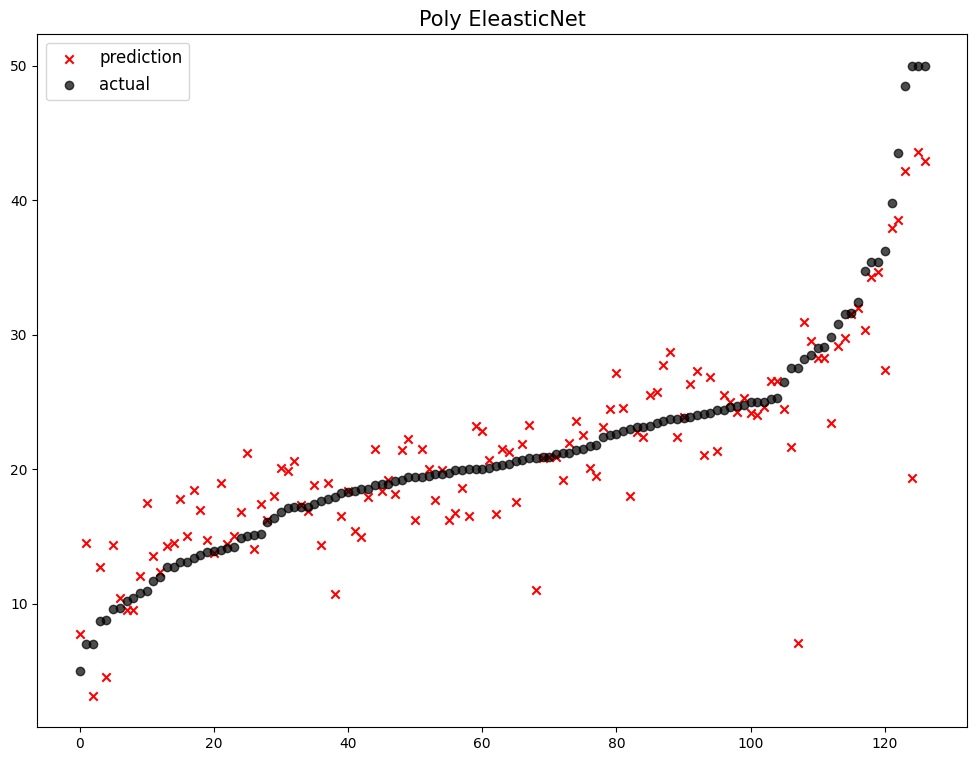

                      model        mse
0      Standard EleasticNet  25.985015
1          LinearRegression  25.525191
2         Lasso(alpha=0.01)  25.380309
3            Ridge(alpha=1)  25.360069
4  Elasticnet(l1_ratio=0.8)  24.385310
5          Poly EleasticNet  20.161027


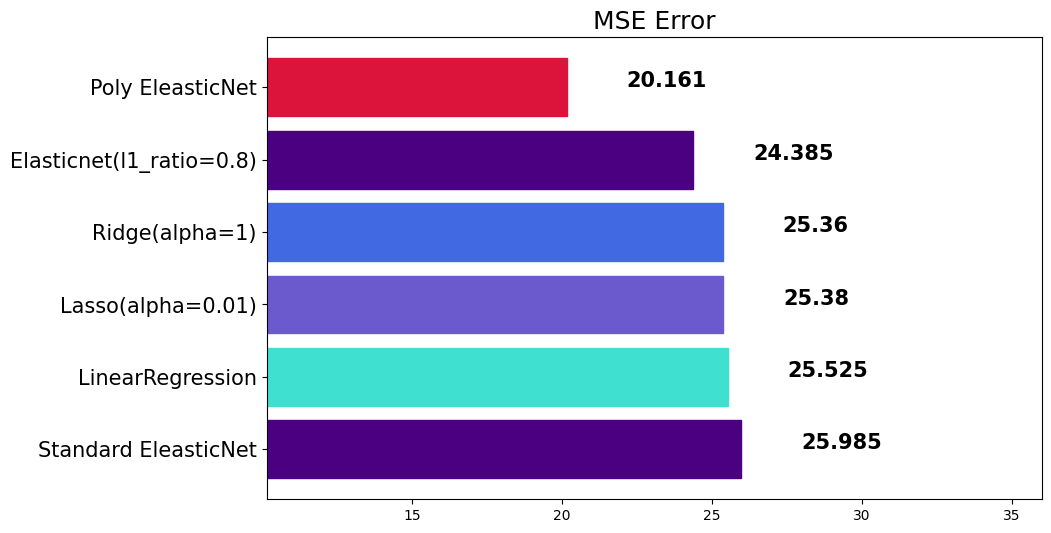

In [8]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly EleasticNet', poly_pred, y_test)

### 1-1. 보팅 Voting
* 투표를 통해 결정하는 방식
  * Voting은 다른 알고리즘 model을 조합해서 사용
  * Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용


In [9]:
from sklearn.ensemble import VotingRegressor

In [10]:
# 반드시 데이터를 Tuple 형태로 모델을 정의해야함
single_models = [
    ('linear_reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet_pipeline', elasticnet_pipeline),
    ('poly_pipeline', poly_pipeline)
]

In [11]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [12]:
voting_regressor.fit(x_train,y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

In [13]:
voting_pred = voting_regressor.predict(x_test)

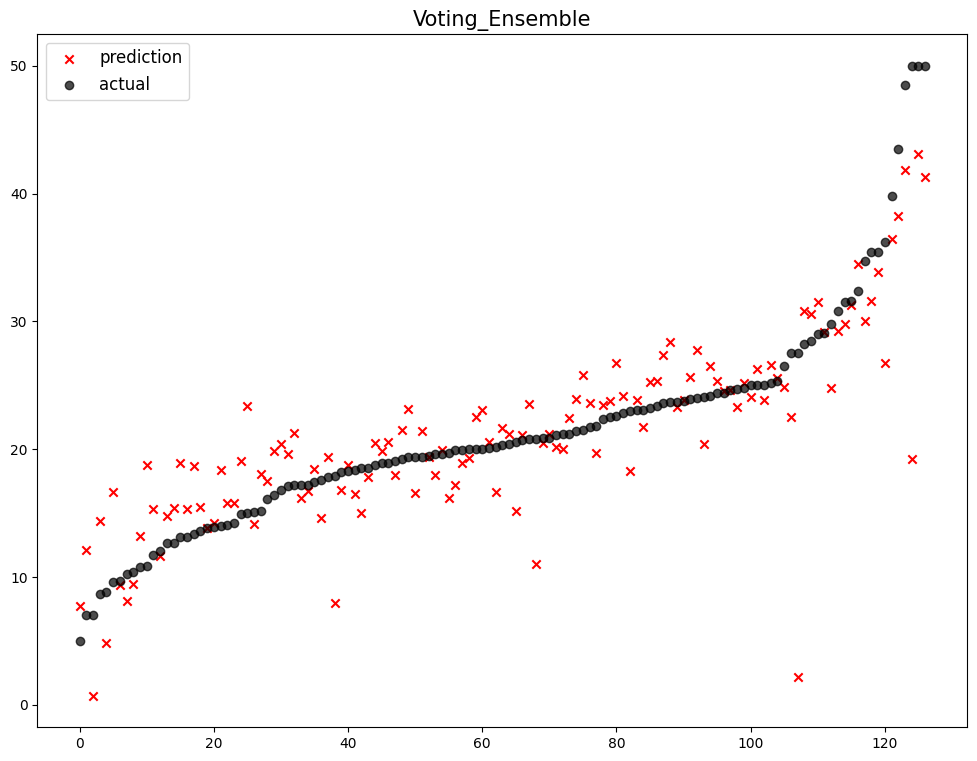

                      model        mse
0      Standard EleasticNet  25.985015
1          LinearRegression  25.525191
2         Lasso(alpha=0.01)  25.380309
3            Ridge(alpha=1)  25.360069
4  Elasticnet(l1_ratio=0.8)  24.385310
5           Voting_Ensemble  23.955103
6          Poly EleasticNet  20.161027


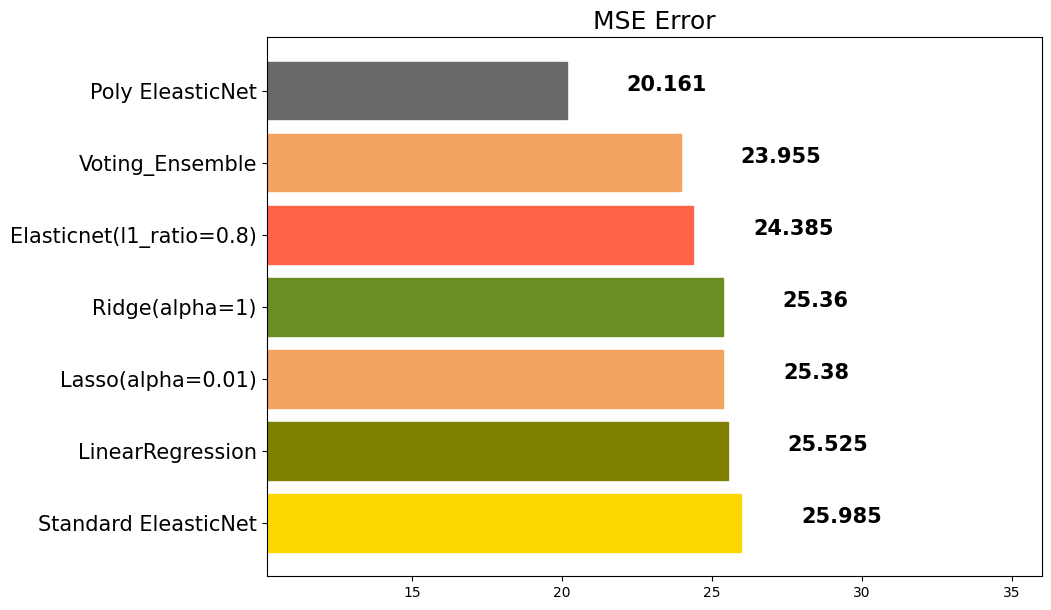

In [14]:
mse_eval('Voting_Ensemble', voting_pred, y_test)

### 1-2. 보팅 Voting 분류
* 분류 모델을 만들때 Voting 앙상블은 voting이라는 하이퍼파라미터를 사용
* hard: class를 0,1로 분류 예측하는 이진 분류일 쌔, 결과 값에 대한 다수 class를 차용
  * 예) 분류를 예측한 값이 1, 0, 0, 1, 1이였다면 1이 3표, 0이 2표이므로 1이 최종값으로 예측을 하게 됨
* soft: 각각의 확률의 평균값을 계산한 다음 가장 확률이 높은 값으로 확정
  * 예) class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class1이 나올 확률이 (0.6,0.1,0.1,0.6,0.6)
    * class0이 나올 확률은 (0.4 + 0.9 + 0.9 + 0.4 + 0.4) / 5 = 0.6
    * class1이 나올 확률은 (0.6 + 0.1 + 0.1 + 0.6 + 0.6)/5 = 0.4

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [16]:
models = [
    ('Logistic', LogisticRegression()),
    ('Ridge', RidgeClassifier())
]

In [17]:
vc = VotingClassifier(models, voting='hard')

### 1-3. Bagging 배깅
* Bagging은 Bootstrap Aggregating의 줄임말
* Bootstrap이란 여러개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식
  * 예) 데이터셋의 구성이 [1,2,3,4,5]로 되어 있다면
    * group1 = [1,2,3]
    * group2 = [1,3,4]
    * group3 = [2,3,5]
  * 대표적인 Bagging 앙상블
    * Random Forest
    * Bagging

### 1-4. Random Forest
* Decision Tree 기반 Bagging 앙상블
* 굉장히 인기있는 앙상블 모델
* 사용성이 쉽고, 성능도 우수함

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

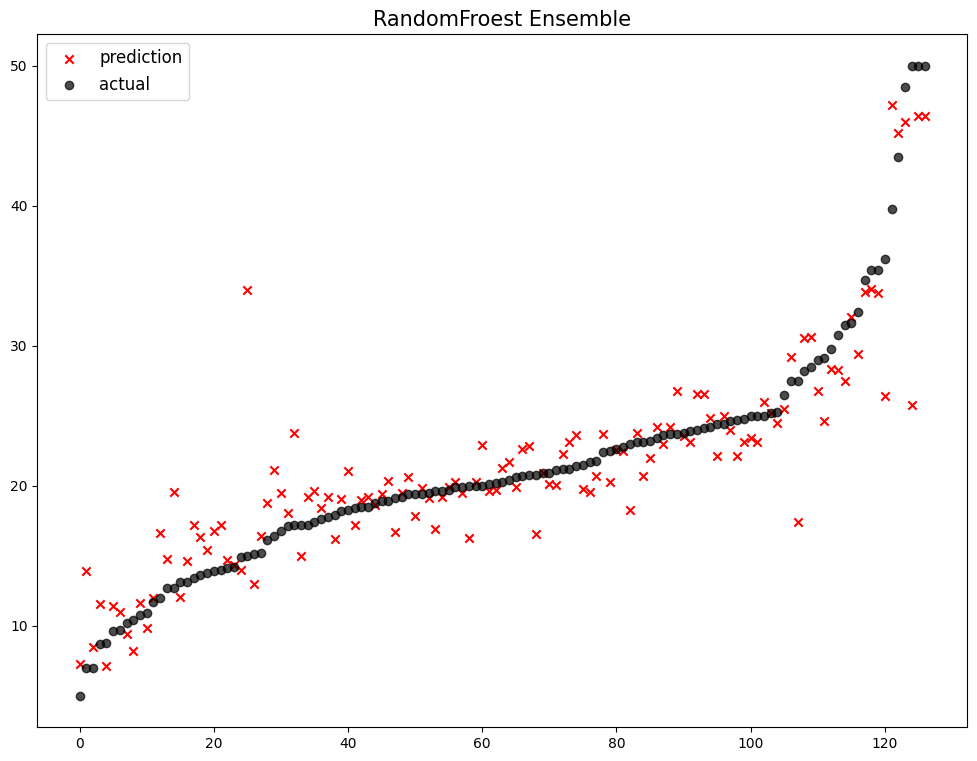

                      model        mse
0      Standard EleasticNet  25.985015
1          LinearRegression  25.525191
2         Lasso(alpha=0.01)  25.380309
3            Ridge(alpha=1)  25.360069
4  Elasticnet(l1_ratio=0.8)  24.385310
5           Voting_Ensemble  23.955103
6          Poly EleasticNet  20.161027
7     RandomFroest Ensemble  14.219429


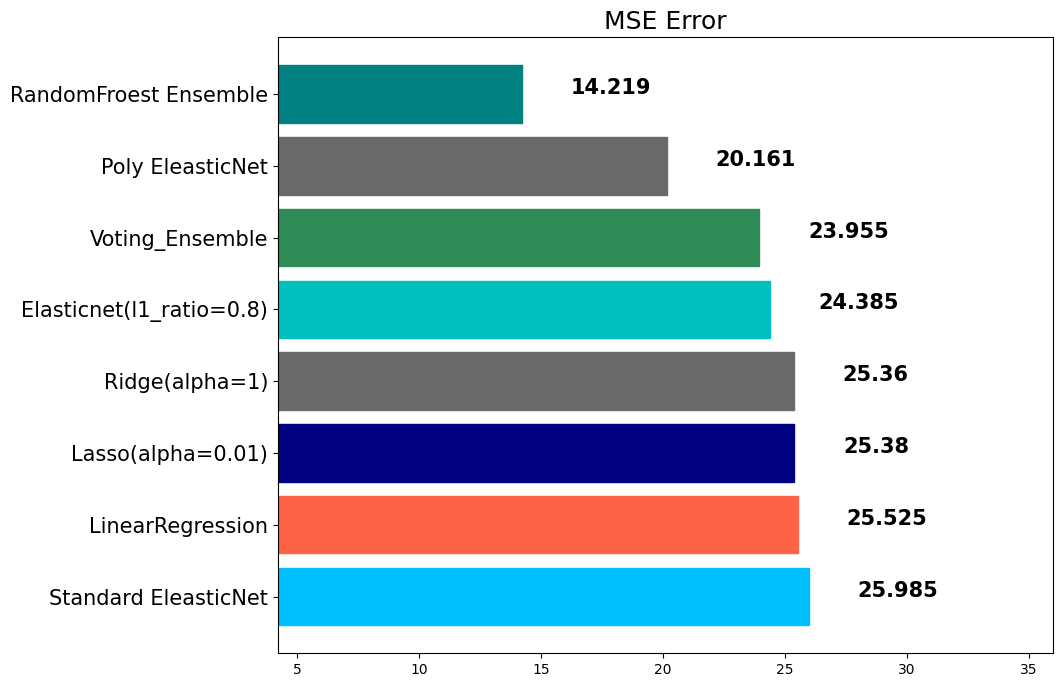

In [20]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomFroest Ensemble', rfr_pred, y_test)

* max_depth : 깊어질 수 있는 최대 깊이
  * 깊이가 깊어질수록 overfitting이 올라감
* n_estimators: 앙상블하는 트리의 개수
* max_features: 최대로 사용할 feature의 개수, 과대적합 방지용
* min_samples_split: 트리가 분할할때 최소 샘플의 개수, 과대적합 방지용

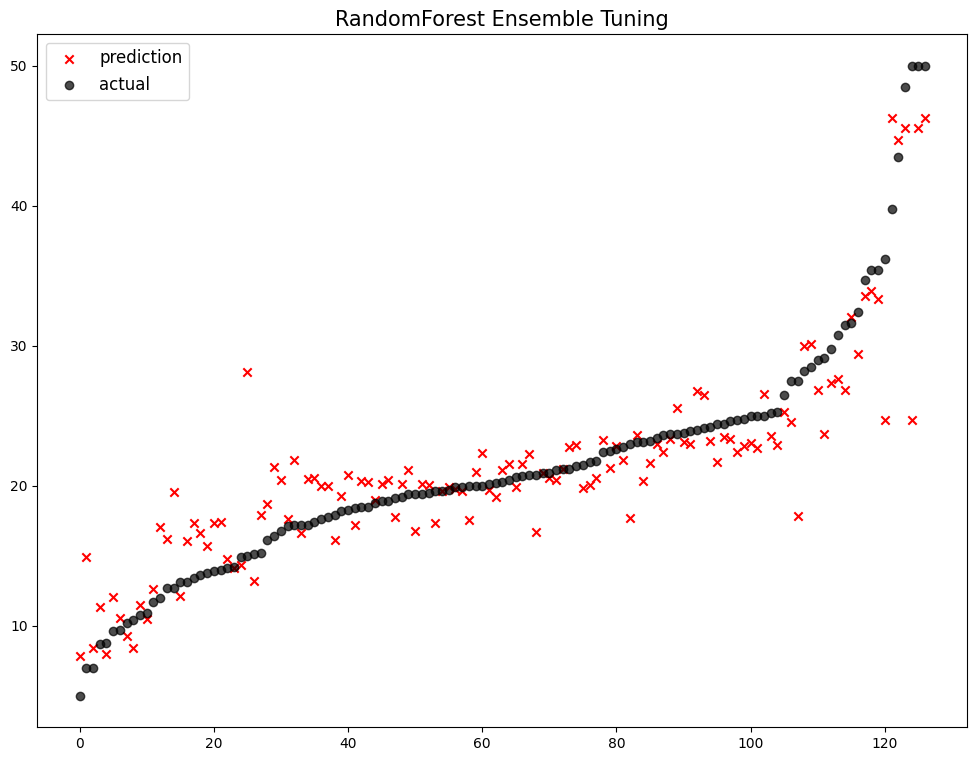

                          model        mse
0          Standard EleasticNet  25.985015
1              LinearRegression  25.525191
2             Lasso(alpha=0.01)  25.380309
3                Ridge(alpha=1)  25.360069
4      Elasticnet(l1_ratio=0.8)  24.385310
5               Voting_Ensemble  23.955103
6              Poly EleasticNet  20.161027
7         RandomFroest Ensemble  14.219429
8  RandomForest Ensemble Tuning  13.918197


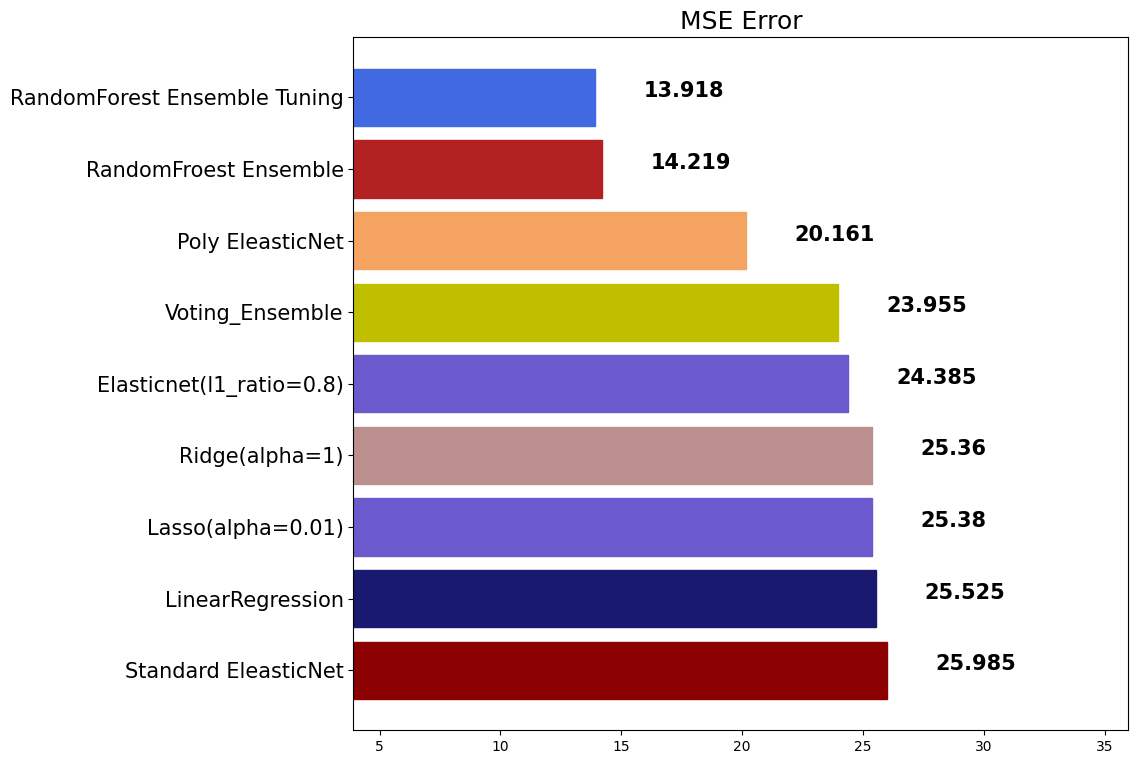

In [21]:
rfr = RandomForestRegressor(random_state=10, n_estimators=1000, max_depth=7, max_features=0.9)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble Tuning', rfr_pred, y_test)

### 1-5. Boosting
* 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식
* 장점: 성능이 매우 우수함(Lgbm, XGBoost)
* 단점: 부스팅 알고리즘의 특성상 약점을 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요이상으로 민감할 수 있음. 그렇기 때문에 매우 오래걸림

### 1-6 GradientBoost
* 성능이 우수함
* 학습시간이 너무너무너무너무 느림

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

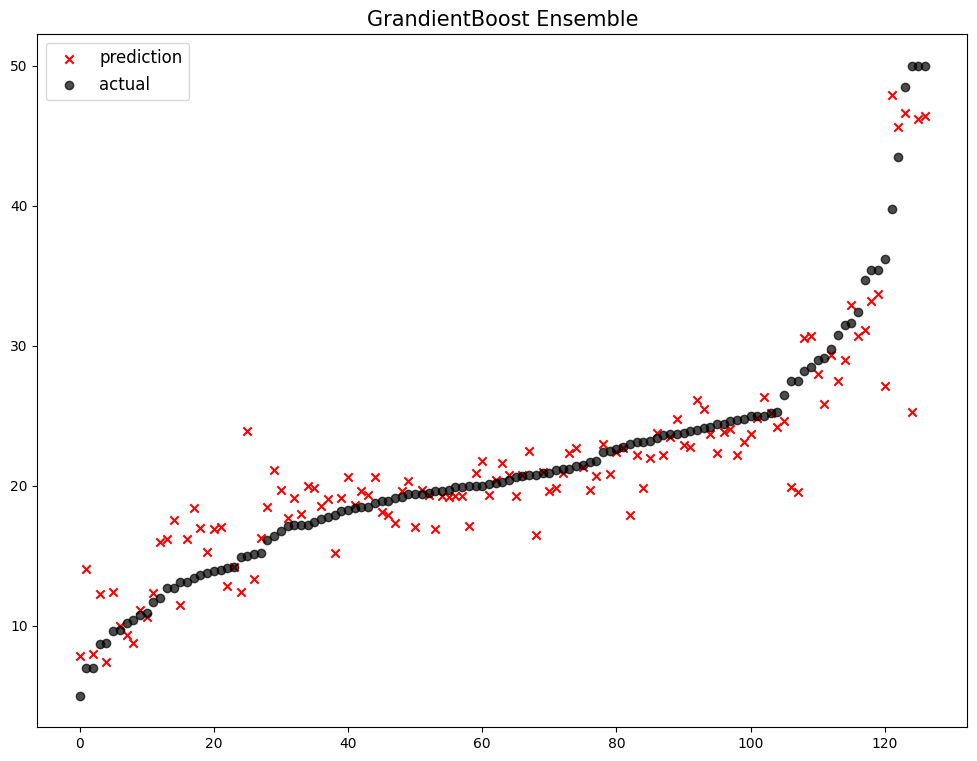

                          model        mse
0          Standard EleasticNet  25.985015
1              LinearRegression  25.525191
2             Lasso(alpha=0.01)  25.380309
3                Ridge(alpha=1)  25.360069
4      Elasticnet(l1_ratio=0.8)  24.385310
5               Voting_Ensemble  23.955103
6              Poly EleasticNet  20.161027
7         RandomFroest Ensemble  14.219429
8  RandomForest Ensemble Tuning  13.918197
9       GrandientBoost Ensemble  11.801215


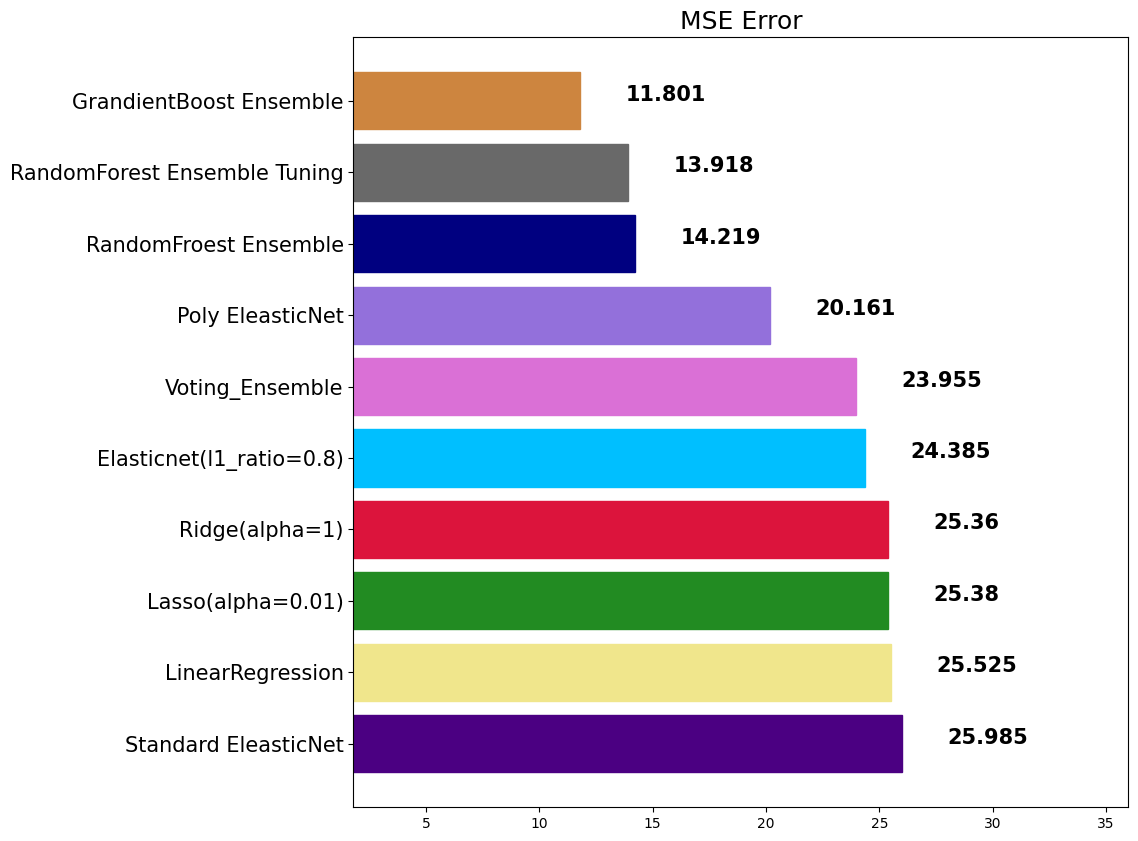

In [23]:
gbr = GradientBoostingRegressor(random_state=10)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GrandientBoost Ensemble', gbr_pred, y_test)

* learning_rate : 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습시간이 매우 느림 (default=0.1)
* 딥러닝에서도 매우 중요한 요소
* 이것은 한 점의 기울기를 미분으로 구할때 (기울기가 0이 되는 점이 best), 점을 얼마만큼 이동할지 정해줌. (너무 작으면 시간이 오래걸리고, 너무 크면 0이 기울기인 점을 지날 수 있다)

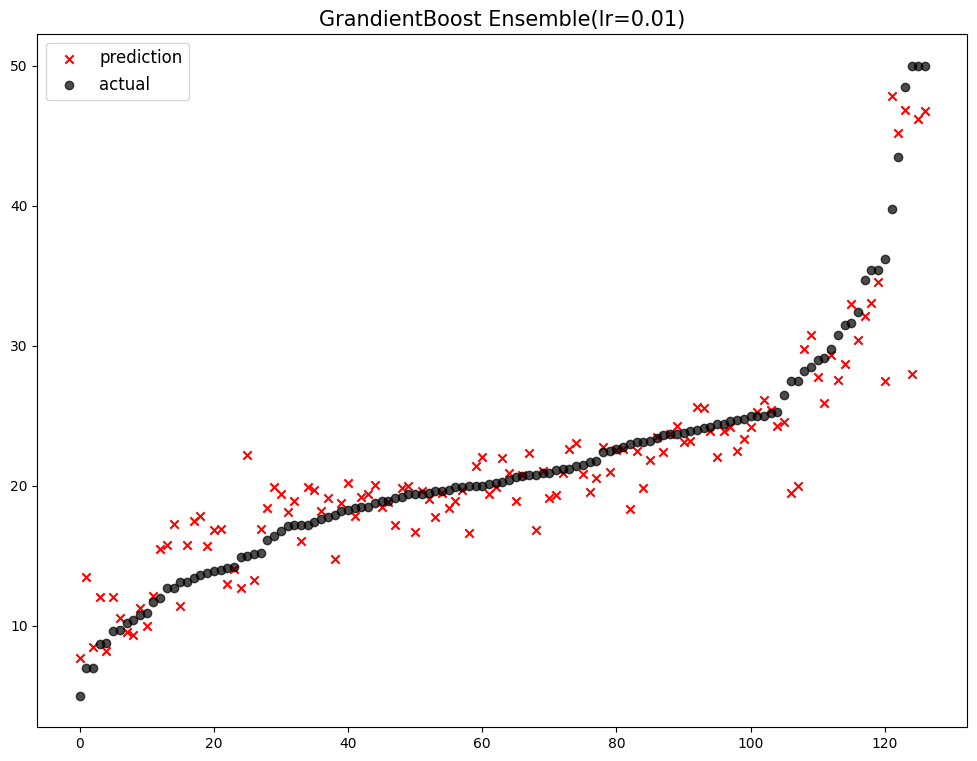

                               model        mse
0               Standard EleasticNet  25.985015
1                   LinearRegression  25.525191
2                  Lasso(alpha=0.01)  25.380309
3                     Ridge(alpha=1)  25.360069
4           Elasticnet(l1_ratio=0.8)  24.385310
5                    Voting_Ensemble  23.955103
6                   Poly EleasticNet  20.161027
7              RandomFroest Ensemble  14.219429
8       RandomForest Ensemble Tuning  13.918197
9            GrandientBoost Ensemble  11.801215
10  GrandientBoost Ensemble(lr=0.01)  10.098514


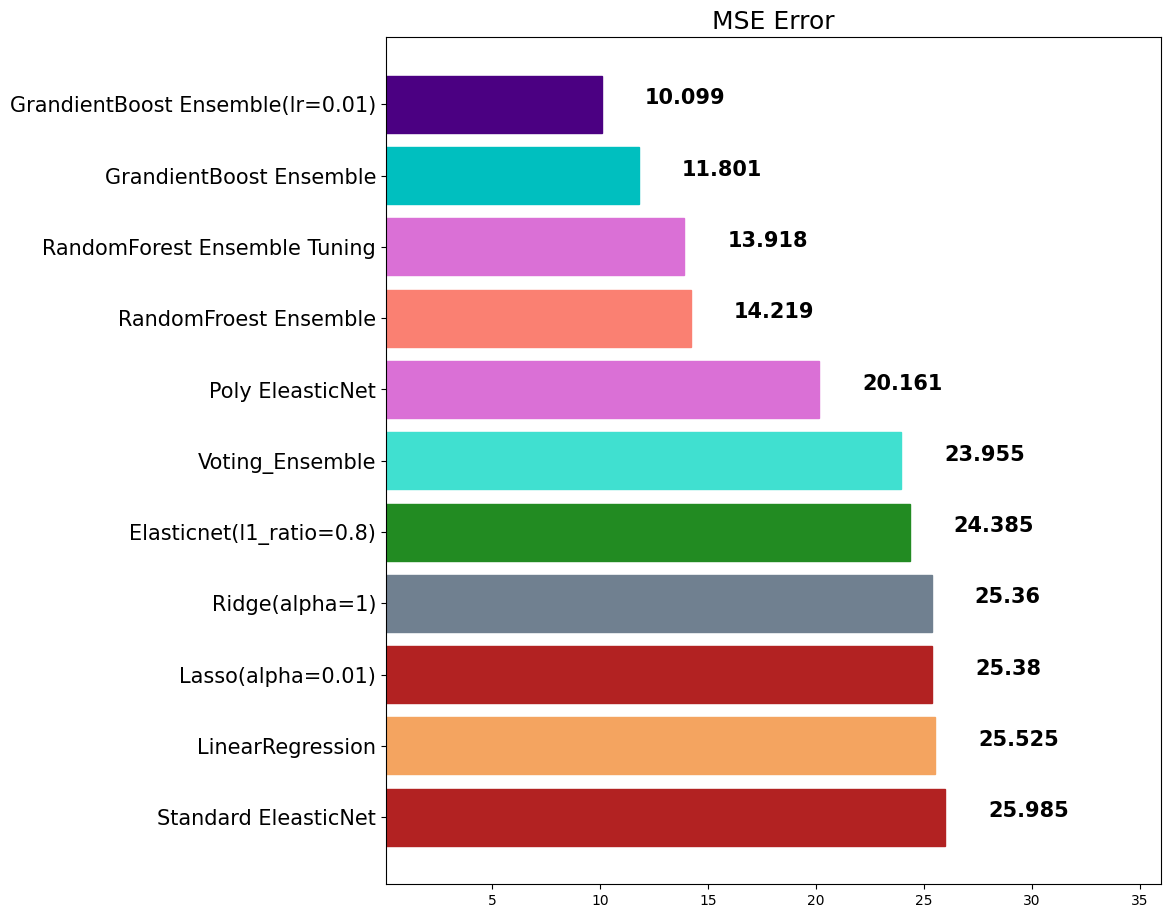

In [24]:
gbr = GradientBoostingRegressor(random_state=10, learning_rate=0.01, n_estimators=1000)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GrandientBoost Ensemble(lr=0.01)', gbr_pred, y_test)

### 1-7. XGBoost
* eXtreme Gradient Boosting
* scikit-learn 패키지가 아님
* 성능이 우수함
* 학습시간이 많이 많이 느림

In [25]:
from xgboost import XGBRegressor

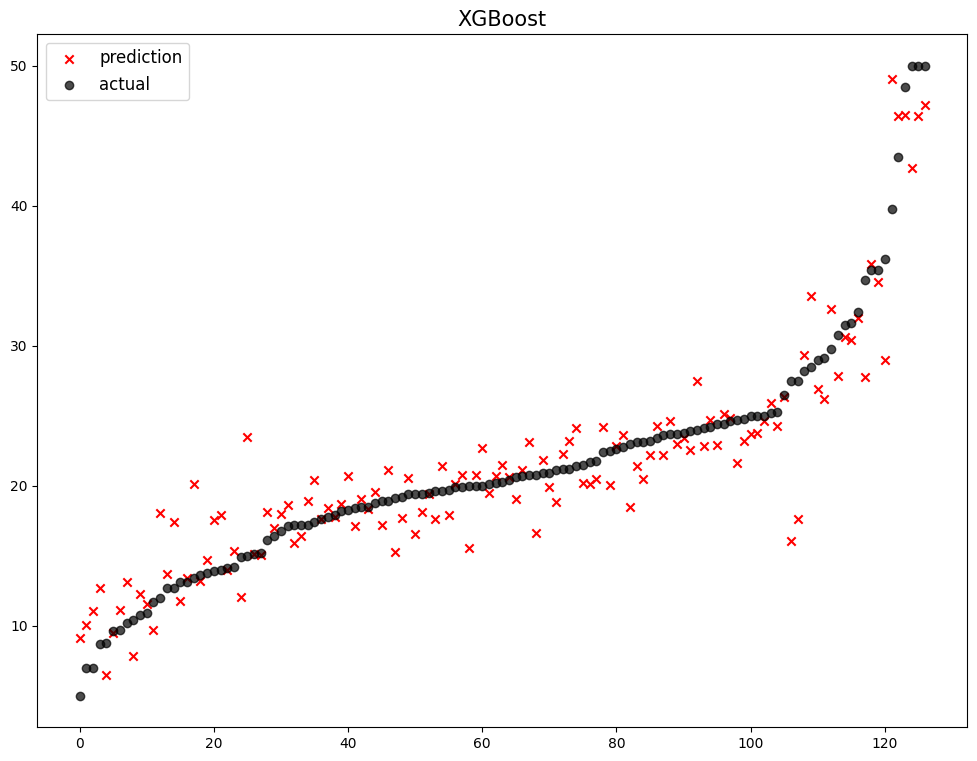

                               model        mse
0               Standard EleasticNet  25.985015
1                   LinearRegression  25.525191
2                  Lasso(alpha=0.01)  25.380309
3                     Ridge(alpha=1)  25.360069
4           Elasticnet(l1_ratio=0.8)  24.385310
5                    Voting_Ensemble  23.955103
6                   Poly EleasticNet  20.161027
7              RandomFroest Ensemble  14.219429
8       RandomForest Ensemble Tuning  13.918197
9            GrandientBoost Ensemble  11.801215
10  GrandientBoost Ensemble(lr=0.01)  10.098514
11                           XGBoost   8.694531


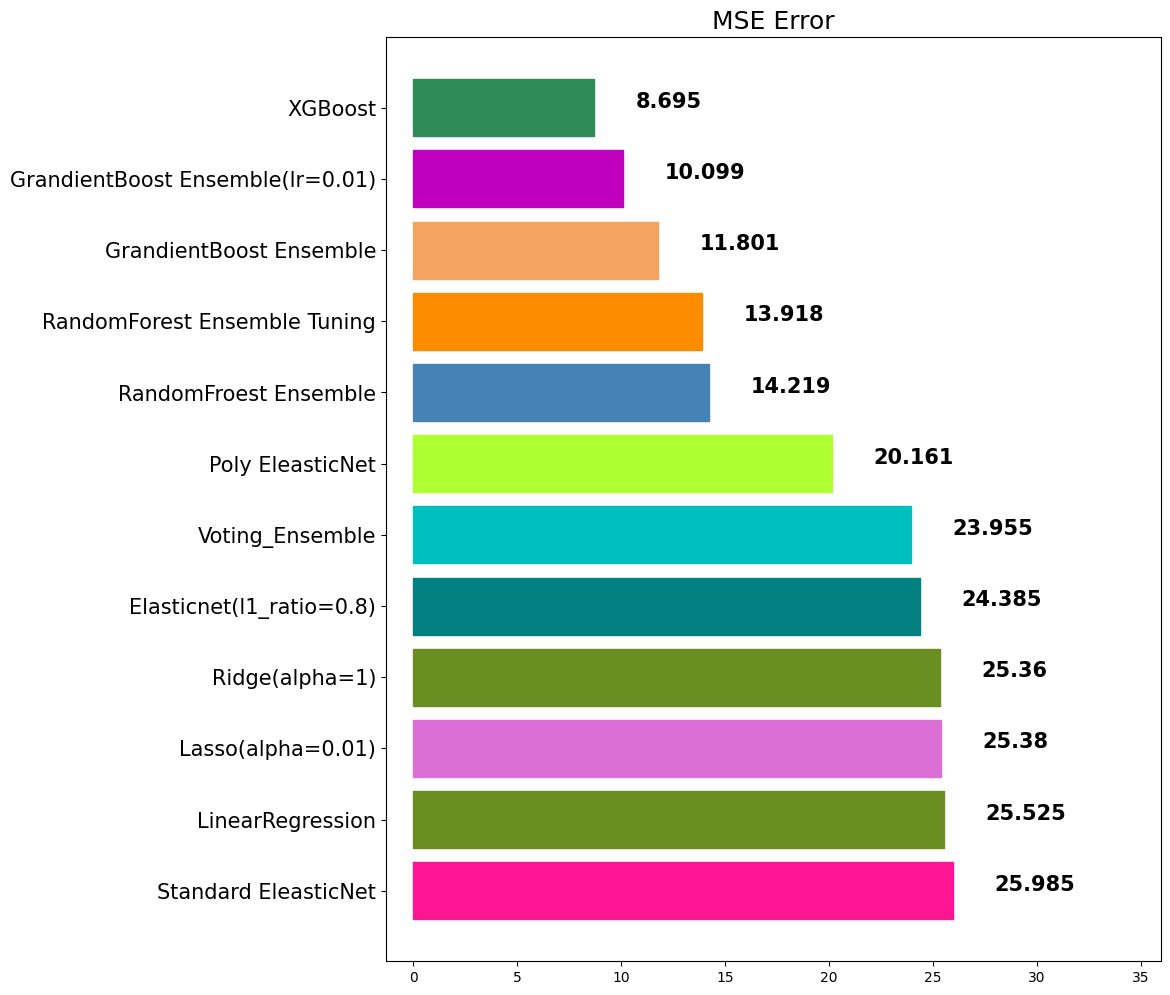

In [26]:
xgb = XGBRegressor(random_state=10)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', xgb_pred, y_test)

### 1-8. LightGBM
* 사이킷런 패키지가 아님
* 성능 우수
* 속도가 빠름
* 트리기반의 알고리즘
* 단, 데이터가 많아야 성능을 발휘

In [27]:
from lightgbm import LGBMRegressor

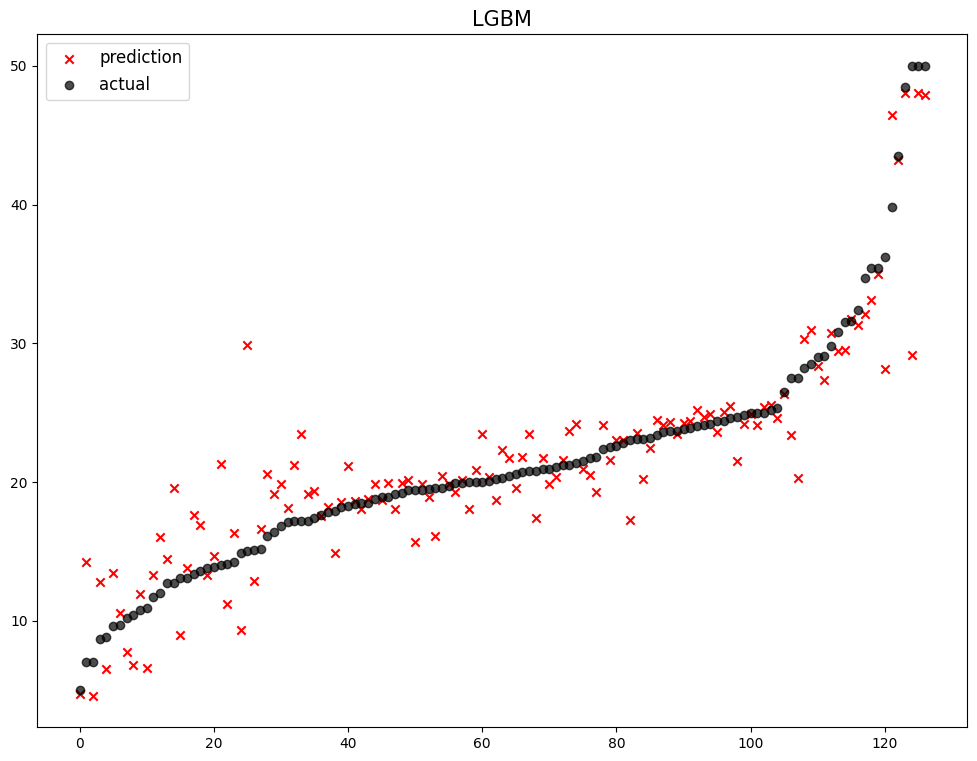

                               model        mse
0               Standard EleasticNet  25.985015
1                   LinearRegression  25.525191
2                  Lasso(alpha=0.01)  25.380309
3                     Ridge(alpha=1)  25.360069
4           Elasticnet(l1_ratio=0.8)  24.385310
5                    Voting_Ensemble  23.955103
6                   Poly EleasticNet  20.161027
7              RandomFroest Ensemble  14.219429
8       RandomForest Ensemble Tuning  13.918197
9                               LGBM  11.933251
10           GrandientBoost Ensemble  11.801215
11  GrandientBoost Ensemble(lr=0.01)  10.098514
12                           XGBoost   8.694531


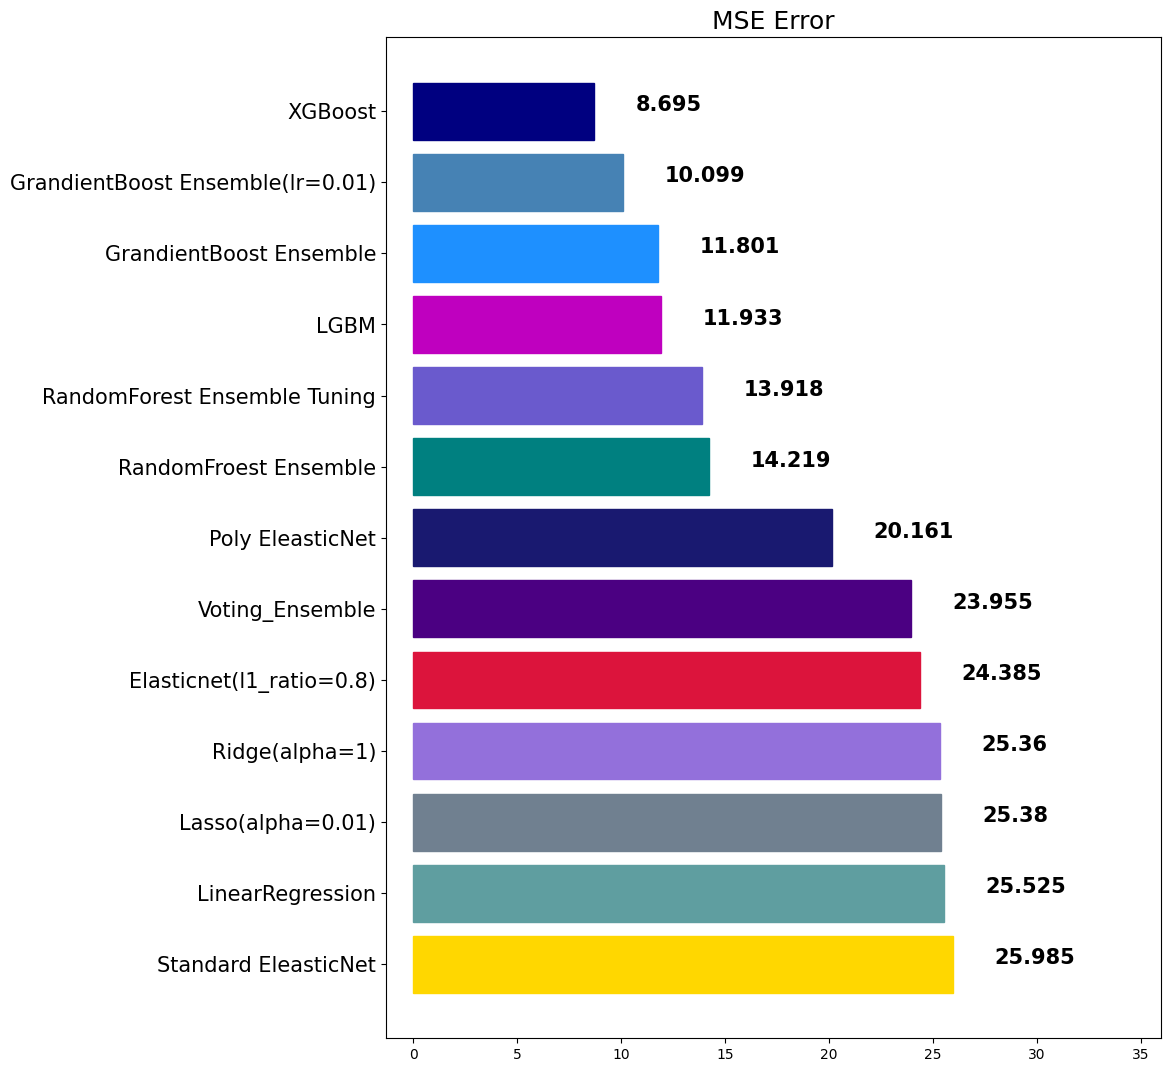

In [28]:
lgbm = LGBMRegressor(random_state=10)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

### 1-9. Stacking
* 개별 모델이 예측한 데이터를 기반으로 final_estimator를 종합하여 예측을 수행
* 성능을 극으로 끌어올릴 때 활용
* 과대적합을 유발할 수 있음 (특히 데이터셋이 적은 경우)

In [29]:
from sklearn.ensemble import StackingRegressor

In [30]:
stack_models = [
    ('elasticnet', poly_pipeline),
    ('randomforest', rfr),
    ('gbr', gbr),
    ('lgbm', lgbm)
]

In [31]:
# final_estimator : 극으로 끌어올리기 위해 한번 더
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)

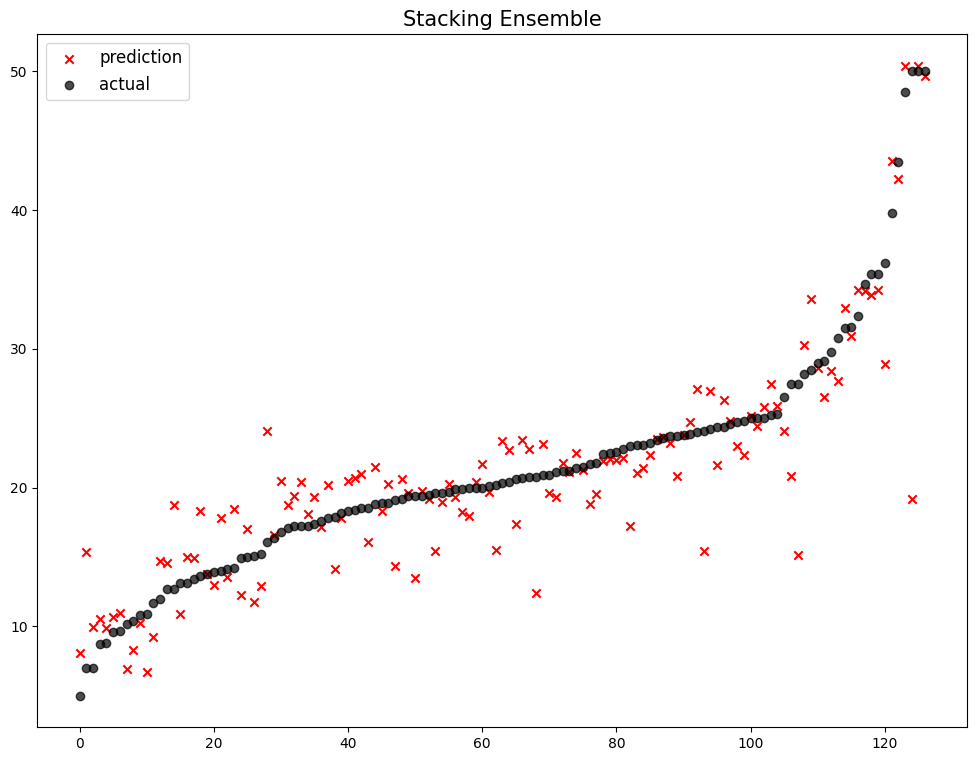

                               model        mse
0               Standard EleasticNet  25.985015
1                   LinearRegression  25.525191
2                  Lasso(alpha=0.01)  25.380309
3                     Ridge(alpha=1)  25.360069
4           Elasticnet(l1_ratio=0.8)  24.385310
5                    Voting_Ensemble  23.955103
6                   Poly EleasticNet  20.161027
7                  Stacking Ensemble  16.741851
8              RandomFroest Ensemble  14.219429
9       RandomForest Ensemble Tuning  13.918197
10                              LGBM  11.933251
11           GrandientBoost Ensemble  11.801215
12  GrandientBoost Ensemble(lr=0.01)  10.098514
13                           XGBoost   8.694531


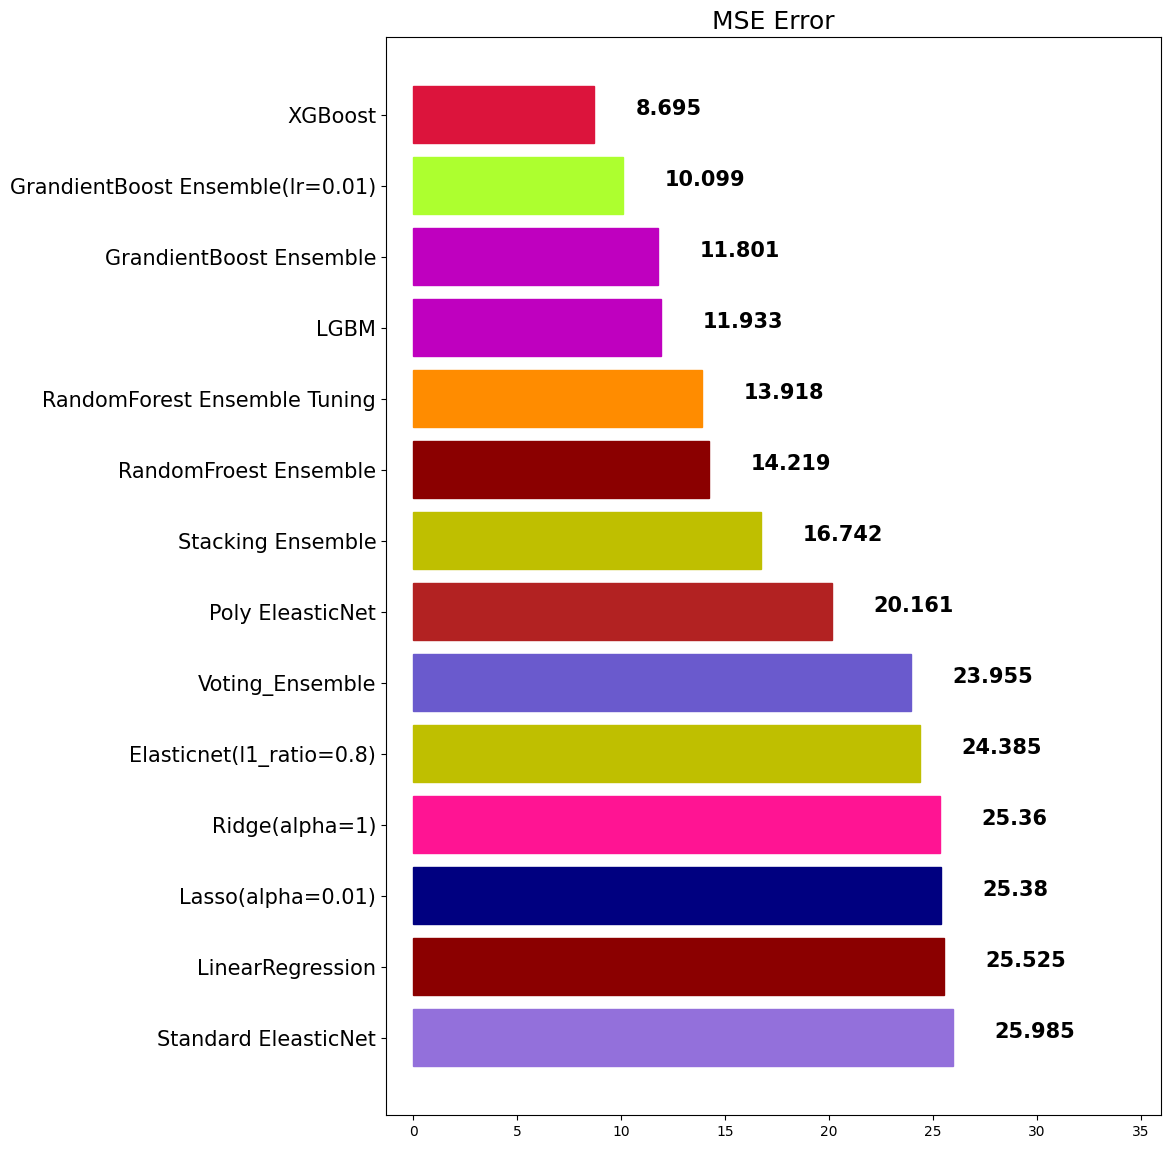

In [32]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

### 1-10. Weighted Blending
* 각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
* 모델의 대한 가중치를 조절하여, 최종 output을 산술
* 가중치의 합은 1.0이 되도록 함

In [33]:
final_outputs = {
    'elasticnet': poly_pred,
    'randomforest': rfr_pred,
    'gbr': gbr_pred,
    'xgb': xgb_pred,
    'lgbm': lgbm_pred,
    'stacking': stack_pred
}

In [34]:
final_prediction = final_outputs['elasticnet'] * 0.1\
  + final_outputs['randomforest'] * 0.1\
  + final_outputs['gbr'] * 0.2\
  + final_outputs['xgb'] * 0.25\
  + final_outputs['lgbm'] * 0.15\
  + final_outputs['stacking'] * 0.2

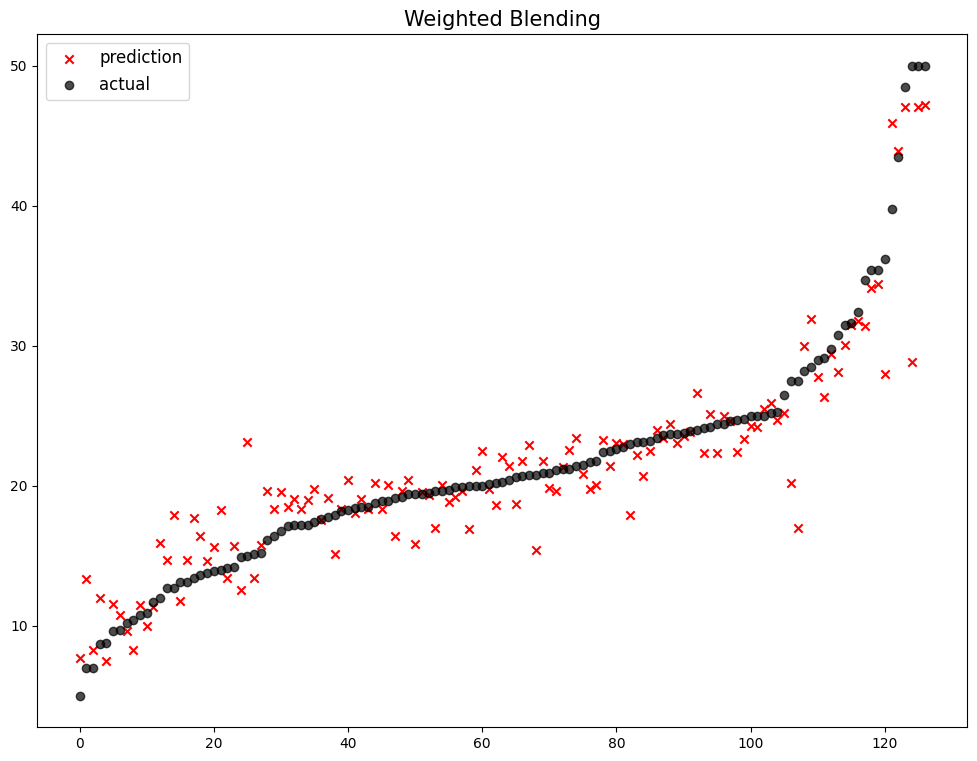

                               model        mse
0               Standard EleasticNet  25.985015
1                   LinearRegression  25.525191
2                  Lasso(alpha=0.01)  25.380309
3                     Ridge(alpha=1)  25.360069
4           Elasticnet(l1_ratio=0.8)  24.385310
5                    Voting_Ensemble  23.955103
6                   Poly EleasticNet  20.161027
7                  Stacking Ensemble  16.741851
8              RandomFroest Ensemble  14.219429
9       RandomForest Ensemble Tuning  13.918197
10                              LGBM  11.933251
11           GrandientBoost Ensemble  11.801215
12  GrandientBoost Ensemble(lr=0.01)  10.098514
13                 Weighted Blending   9.918380
14                           XGBoost   8.694531


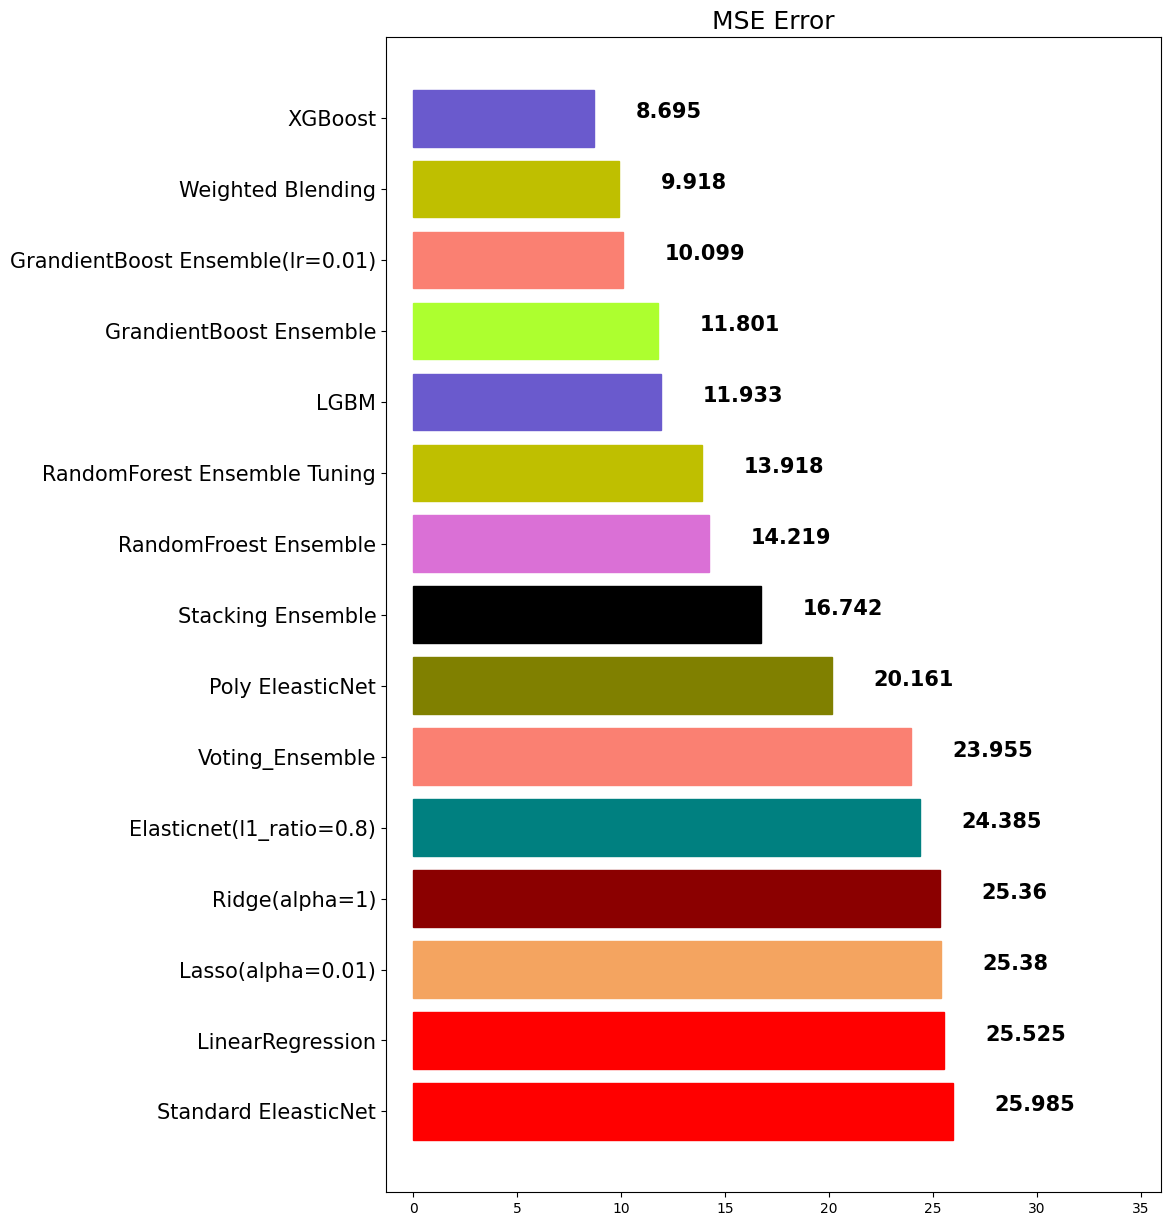

In [35]:
mse_eval('Weighted Blending', final_prediction, y_test)

### 1-11. 앙상블 모델 정리
* 앙상블은 대체적으로 단일 모델 대비 성능이 좋음
* 앙상블을 또 다시 앙상블 하는 기법인 Stacking과 Weighted Blending도 고려해볼만한 기법
* 앙상블 모델은 적절한 하이퍼파라미터 튜닝이 매우 중요
* 앙상블 모델은 대체적으로 학습시간이 더 오래 걸림
* 모델 튜닝을 하는데 걸리는 시간이 매우 오래 걸림

# 2. 하이퍼파라미터 튜닝

* 하이퍼파라미터 튜닝시 경우의 수가 너무 많음
* 자동화 할 필요가 있음
* sklearn 패키지에서는 사용되는 하이퍼파라미터 튜닝을 돕는 클래스가 존재
  * RandomizedsearchCV
  * GridSearchCV


### 2-1. RandomizedSearchCV
* 모든 매개변수값이 시도되는 것이 아니라 지정된 분포에서 고정된 수의 매개변수 설정이 샘플링 됨
* 시도된 매개변수 설정의 수는 n_iter에 의해 제공됨

### 2-2. 클래스 적용 방법
* 사용할 Search 방법을 선택
* 하이퍼파라미터 도메인을 설정 (max_depth, n_estimators, ..등등)
* 학습을 시킴
* 도출된 결과값을 모델에 적용하고 성능을 비교

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# 내가 해볼 수 있는 조합의 element들을 다 넣어줌
params = {
    'n_estimators':[200, 500, 1000, 2000],
    'learning_rate':[0.1, 0.05, 0.01],
    'max_depth':[6, 7, 8],
    'colsample_bytree':[0.8, 0.9, 1.0], # 샘플 사용 비율(max_features와 비슷한 개념)
    'subsample':[0.8, 0.9, 1.0]
}

In [39]:
# 위의 하이퍼파라미터 params를 randomize하게 조합해봄
# n_iter = 몇개의 조합을 진행할 것인지 설정 (횟수가 늘어나면 좋은 parameter를 찾을 확률은 높지만 시간이 오래걸린다는 단점)
# cv = cross validation
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=10, n_iter=25, cv=3)

In [40]:
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=10)

In [41]:
clf.best_score_

0.7604385509496147

In [42]:
clf.best_params_

{'subsample': 1.0,
 'n_estimators': 500,
 'max_depth': 8,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

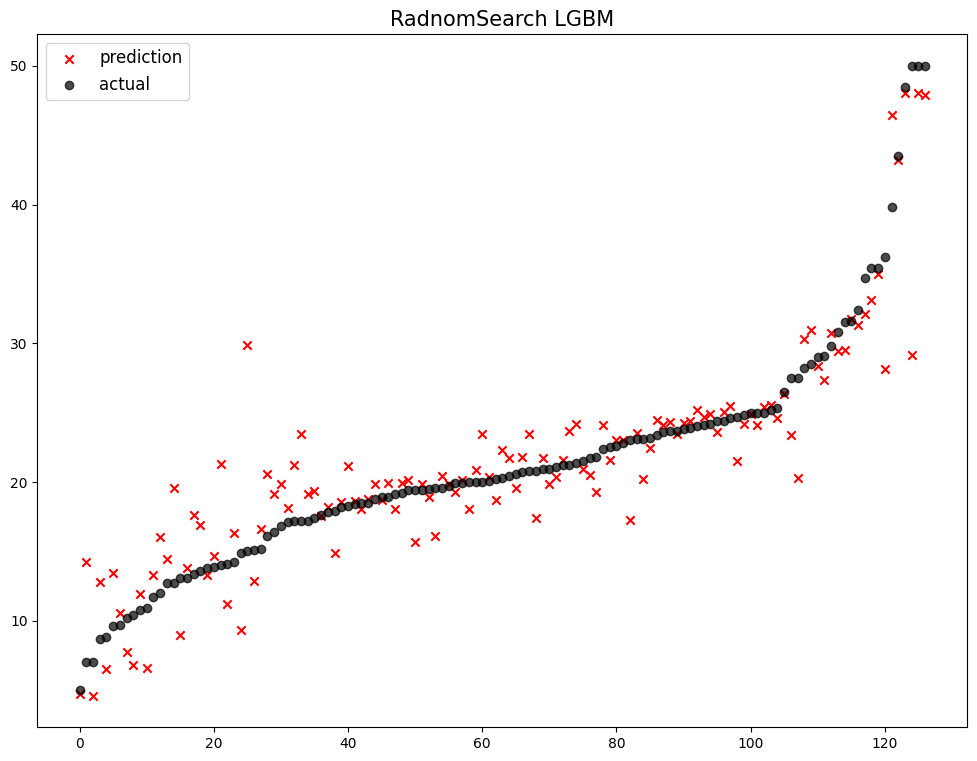

                               model        mse
0               Standard EleasticNet  25.985015
1                   LinearRegression  25.525191
2                  Lasso(alpha=0.01)  25.380309
3                     Ridge(alpha=1)  25.360069
4           Elasticnet(l1_ratio=0.8)  24.385310
5                    Voting_Ensemble  23.955103
6                   Poly EleasticNet  20.161027
7                  Stacking Ensemble  16.741851
8              RandomFroest Ensemble  14.219429
9       RandomForest Ensemble Tuning  13.918197
10                              LGBM  11.933251
11                 RadnomSearch LGBM  11.933251
12           GrandientBoost Ensemble  11.801215
13  GrandientBoost Ensemble(lr=0.01)  10.098514
14                 Weighted Blending   9.918380
15                           XGBoost   8.694531


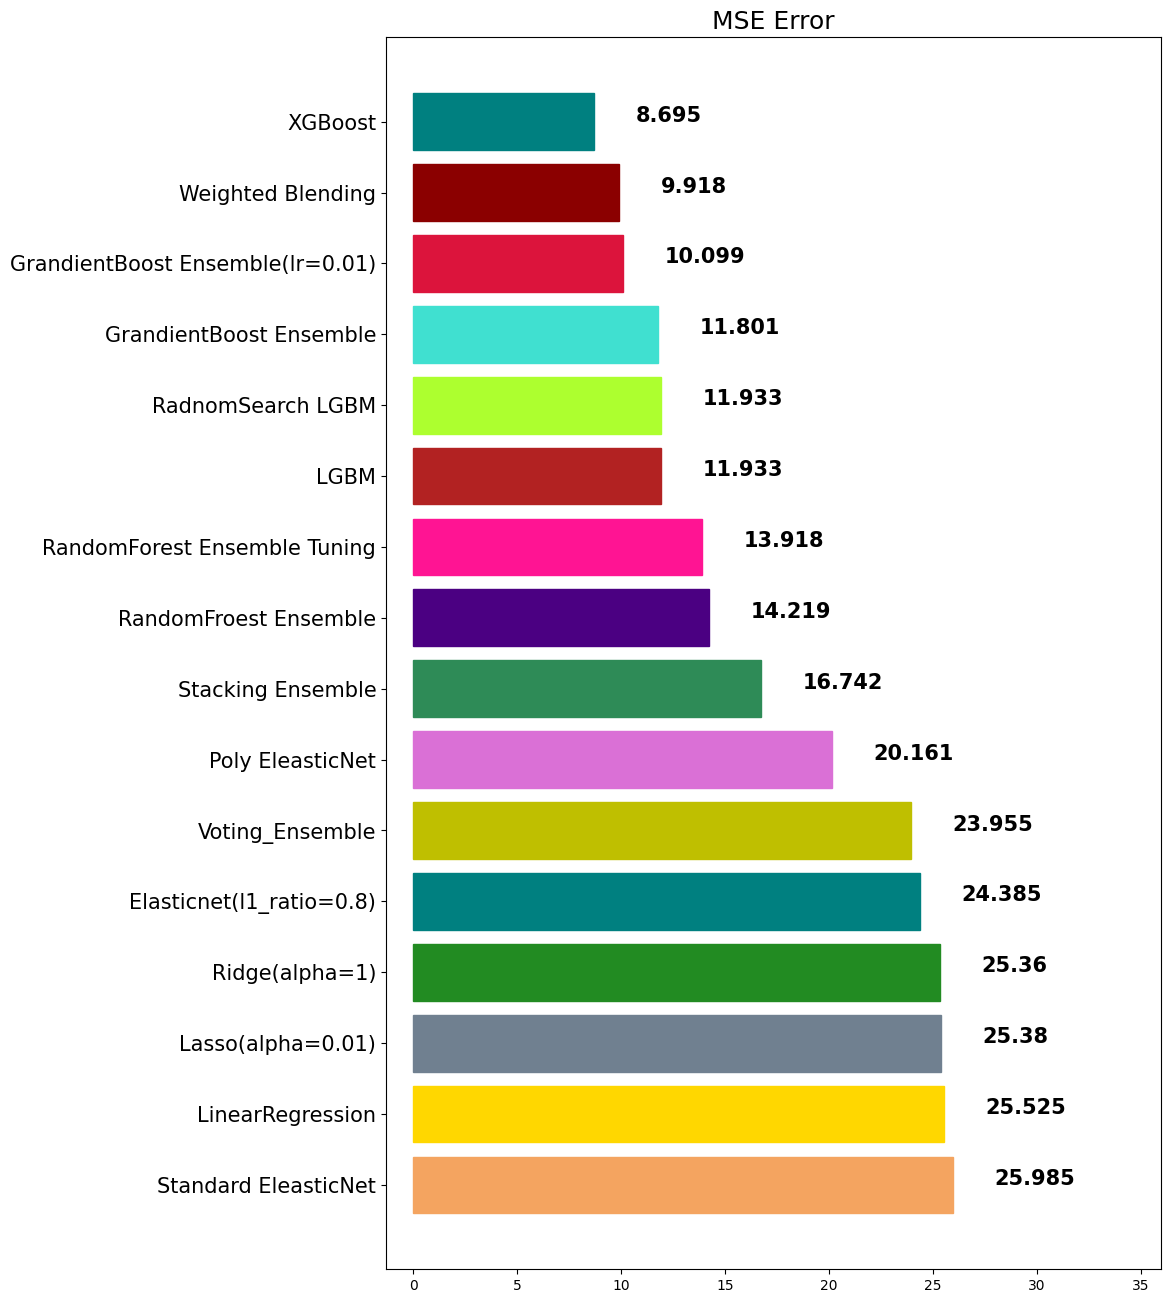

In [43]:
lgbm = LGBMRegressor(subsample=1.0, n_estimators=500, max_depth=8, learning_rate=0.05, colsample_bytree=0.8, random_state=10)
lgbm.fit(x_train, y_train)
lgbm_best_pred = lgbm.predict(x_test)
mse_eval('RadnomSearch LGBM', lgbm_pred, y_test)

### 2-2. GridSearchCV
* 모든 매개변수 값에 대하여 완전 탐색을 시도
* 최적화할 파라미터가 많다면 시간이 매우 오래 걸림

In [44]:
params = {
    'n_estimators':[500, 2000],
    'learning_rate':[0.1, 0.05, 0.01],
    'max_depth':[7, 8],
    'colsample_bytree':[0.8, 0.9], # 샘플 사용 비율(max_features와 비슷한 개념)
    'subsample':[0.8, 0.9]
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [47]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimators': [500, 2000],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [48]:
grid_search.best_score_

-20.546575342985673

In [49]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 2000,
 'subsample': 0.8}

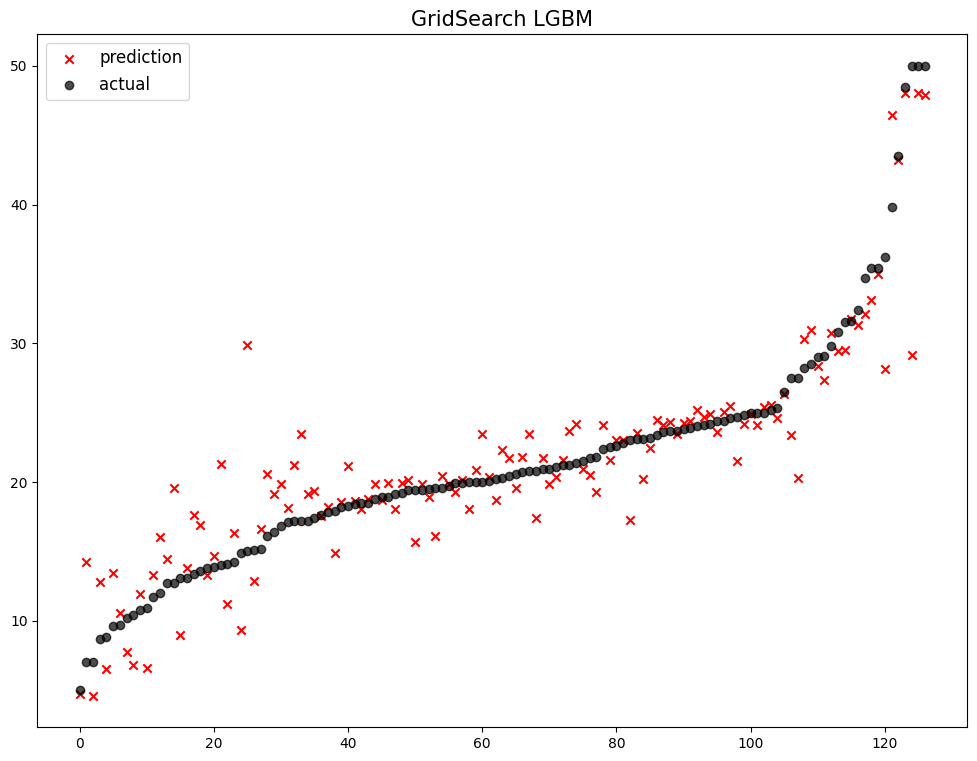

                               model        mse
0               Standard EleasticNet  25.985015
1                   LinearRegression  25.525191
2                  Lasso(alpha=0.01)  25.380309
3                     Ridge(alpha=1)  25.360069
4           Elasticnet(l1_ratio=0.8)  24.385310
5                    Voting_Ensemble  23.955103
6                   Poly EleasticNet  20.161027
7                  Stacking Ensemble  16.741851
8              RandomFroest Ensemble  14.219429
9       RandomForest Ensemble Tuning  13.918197
10                              LGBM  11.933251
11                 RadnomSearch LGBM  11.933251
12                   GridSearch LGBM  11.933251
13           GrandientBoost Ensemble  11.801215
14  GrandientBoost Ensemble(lr=0.01)  10.098514
15                 Weighted Blending   9.918380
16                           XGBoost   8.694531


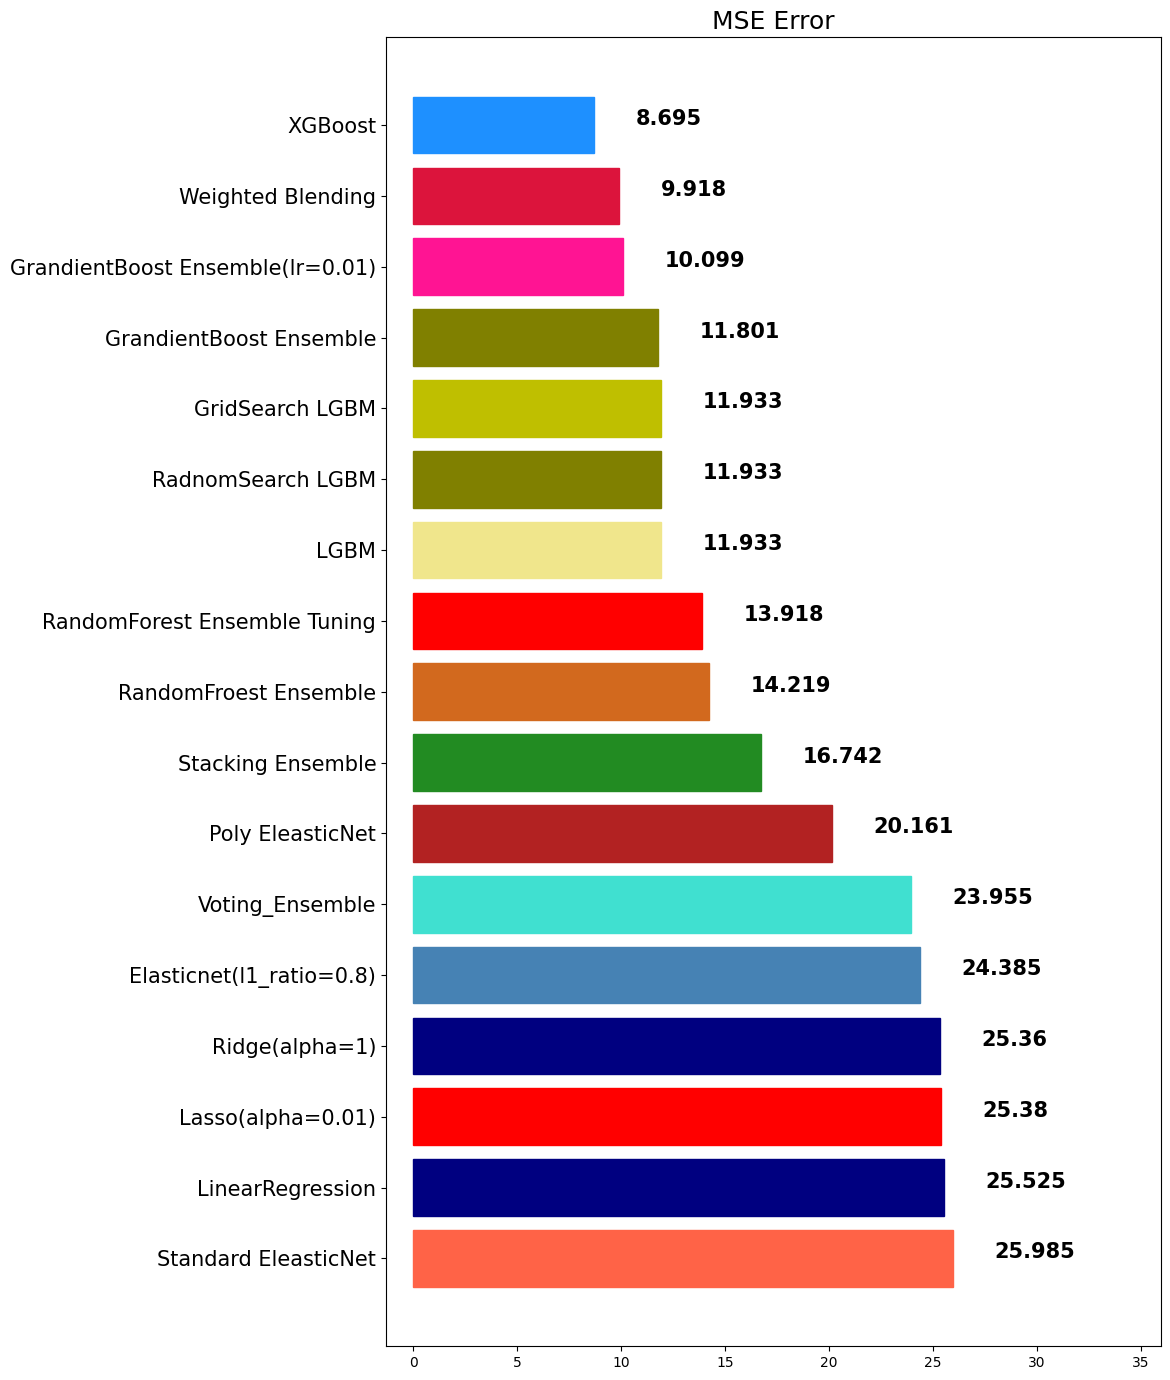

In [50]:
lgbm = LGBMRegressor(subsample=0.8, n_estimators=2000, max_depth=8, learning_rate=0.01, colsample_bytree=0.8, random_state=10)
lgbm.fit(x_train, y_train)
lgbm_best_pred = lgbm.predict(x_test)
mse_eval('GridSearch LGBM', lgbm_pred, y_test)